In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Reading The Data

In [2]:
data = pd.read_csv('train.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## EDA

In [3]:
churn=data[data['Churn']=='Yes']['gender'].value_counts()

In [4]:
not_churn=data[data['Churn']=='No']['gender'].value_counts()


In [5]:
df = pd.DataFrame([churn,not_churn])
df.index = ['churn', 'not_churn']
df

,Female,Male
churn,939,930
not_churn,2549,2625


In [6]:

data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [7]:
def plot_column(ax, x, title):
    sns.countplot(x=x, hue='Churn', data=data, ax=ax)
    ax.set_title(title)
    

## plotting Demographics of Customers

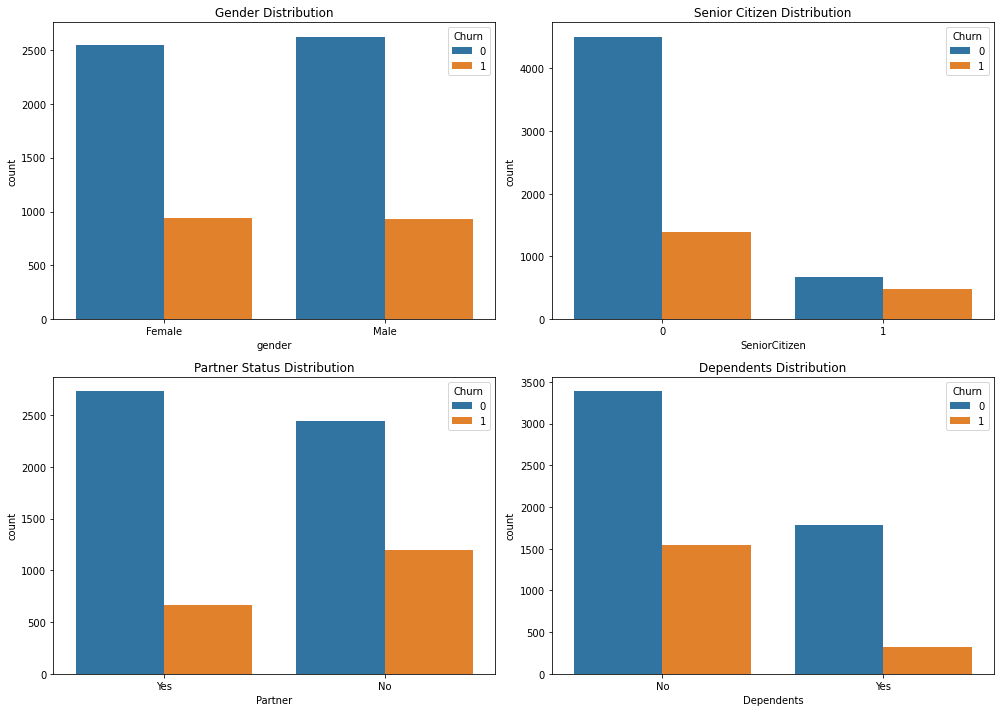

In [8]:


fig, axs = plt.subplots(2, 2, figsize=(14, 10))

plot_column(axs[0, 0], 'gender', 'Gender Distribution')
plot_column(axs[0, 1], 'SeniorCitizen', 'Senior Citizen Distribution')
plot_column(axs[1, 0], 'Partner', 'Partner Status Distribution')
plot_column(axs[1, 1], 'Dependents', 'Dependents Distribution')

plt.tight_layout()
plt.show()

## plotting Services Analysis

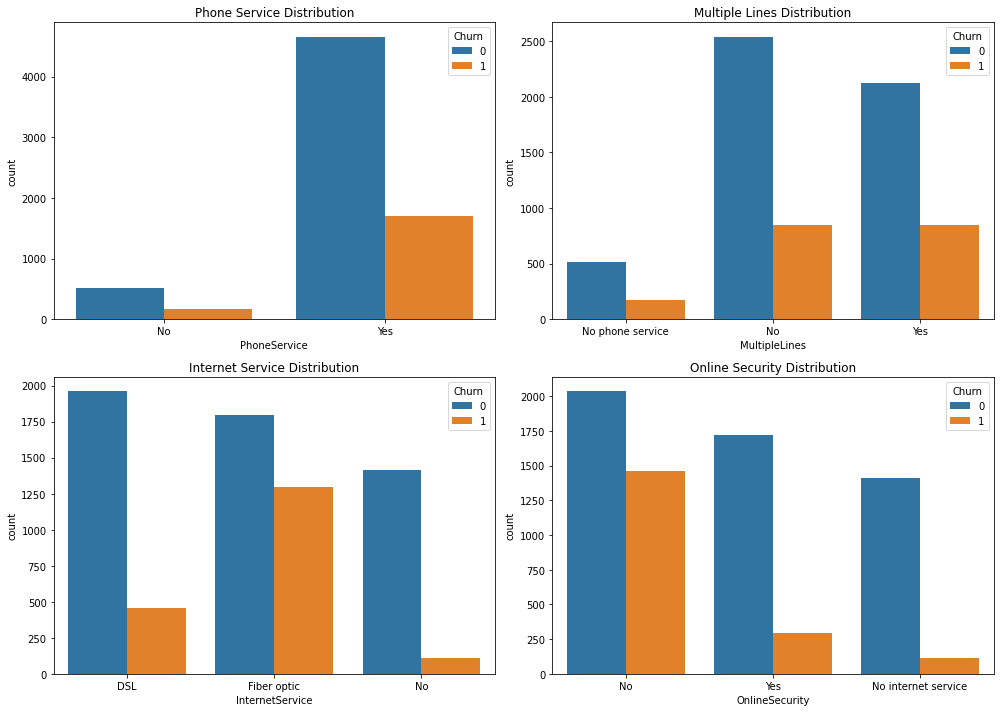

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

plot_column(axs[0, 0], 'PhoneService', 'Phone Service Distribution')
plot_column(axs[0, 1], 'MultipleLines', 'Multiple Lines Distribution')
plot_column(axs[1, 0], 'InternetService', 'Internet Service Distribution')
plot_column(axs[1, 1], 'OnlineSecurity', 'Online Security Distribution')

plt.tight_layout()
plt.show()

## plotting Subscription Analysis

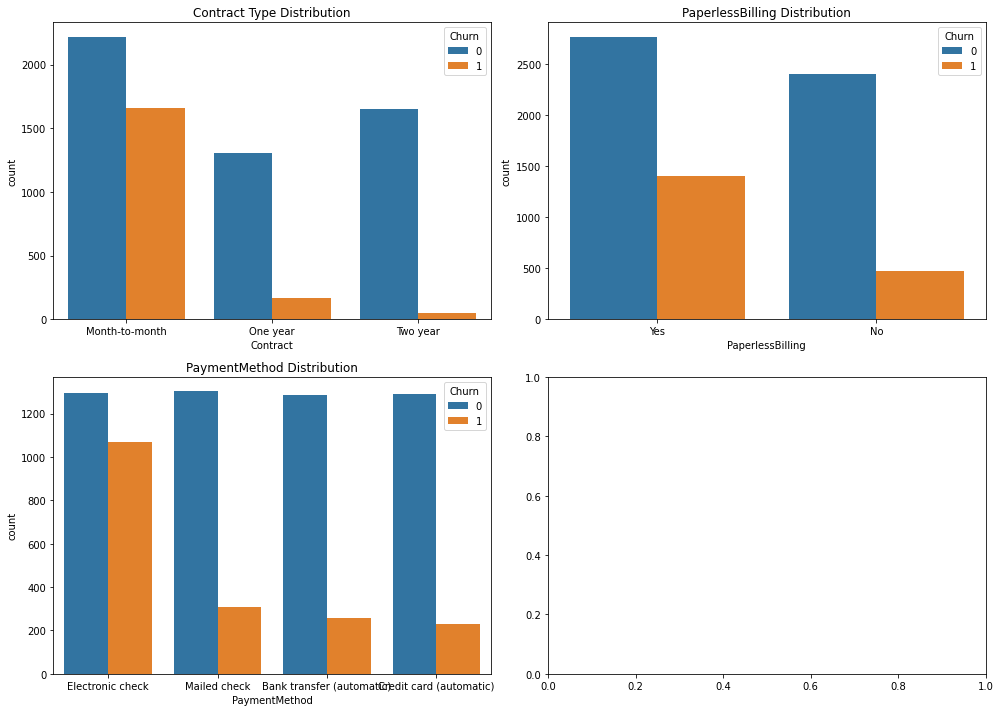

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

plot_column(axs[0, 0], 'Contract', 'Contract Type Distribution')
plot_column(axs[0, 1], 'PaperlessBilling', 'PaperlessBilling Distribution')
plot_column(axs[1, 0], 'PaymentMethod', 'PaymentMethod Distribution')


plt.tight_layout()
plt.show()

## exploring Churned or not by months



c:\Users\hossam gno\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\hossam gno\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


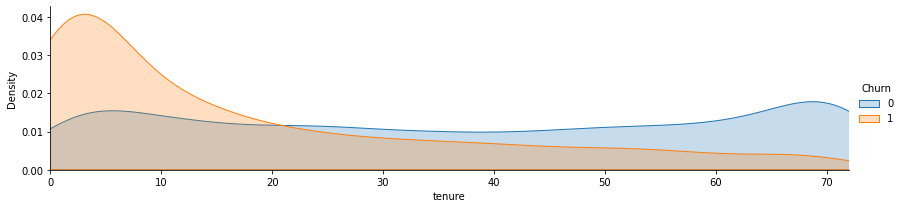

In [11]:
facet = sns.FacetGrid(data, hue="Churn",aspect=4)
facet.map(sns.kdeplot,'tenure',shade= True)
facet.set(xlim=(0, data['tenure'].max()))
facet.add_legend()
 
plt.show() 

In [12]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [13]:
data['TotalCharges'].isnull().sum()

11

In [14]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mean())

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## dealing with categorical data

In [17]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = le.fit_transform(data[col])
    print(le.classes_)
      
data.head(5)

['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
['Female' 'Male']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'No phone service' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'No internet service' 'Yes']
['No' 'No internet service' 'Yes']
['No' 'No internet service' 'Yes']
['No' 'No internet service' 'Yes']
['No' 'No internet service' 'Yes']
['No' 'No internet service' 'Yes']
['Month-to-month' 'One year' 'Two year']
['No' 'Yes']
['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check']


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


## Feature engineering


In [18]:
data['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [19]:
def Update_months(month):
    if month > 0 and  month <= 15:
        return 1
    if month > 15 and month <= 27:
        return 2
    if month > 27 and  month <=45:
        return 3
    if month > 45 :
        return 4        
    return 0
    
data["tenure"] = data["tenure"].apply(lambda x :Update_months(x) )
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,3,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,1,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,3,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data['TotalCharges'] = scaler.fit_transform(data[['TotalCharges']])
data['MonthlyCharges'] = scaler.fit_transform(data[['MonthlyCharges']])
# data['tenure'] = scaler.fit_transform(data[['tenure']])
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,-1.160323,-0.994971,0
1,3962,1,0,0,0,3,1,0,0,2,...,2,0,0,0,1,0,3,-0.259629,-0.173876,0
2,2564,1,0,0,0,1,1,0,0,2,...,0,0,0,0,0,1,3,-0.362660,-0.960399,1
3,5535,1,0,0,0,3,0,1,0,2,...,2,2,0,0,1,0,0,-0.746535,-0.195400,0
4,6511,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,1,2,0.197365,-0.941193,1


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [22]:
y = data["Churn"]
X = data.drop(["Churn","customerID"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [24]:
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, cv=3, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Train Accuracy: {round( ( random_search.score(X_train,y_train)*100 ) , 2 )}%')
print(f'Test Accuracy: {accuracy:.4f}')

Train Accuracy: 89.99%
Test Accuracy: 0.8112


In [25]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train,y_train)
print(f'model trained with accuracy on test data {round( ( lg.score(X_test,y_test)*100 ) , 2 )}%')
print(f'model trained with accuracy on train data {round( ( lg.score(X_train,y_train)*100 ) , 2 )}%')

model trained with accuracy on test data 81.97%
model trained with accuracy on train data 79.69%


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build the model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
# model.add(Dense(16, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
177/177 [==============================] - 1s 3ms/step - loss: 0.5674 - accuracy: 0.7045 - val_loss: 0.4374 - val_accuracy: 0.7715
Epoch 2/50
177/177 [==============================] - 0s 2ms/step - loss: 0.4935 - accuracy: 0.7499 - val_loss: 0.4252 - val_accuracy: 0.7984
Epoch 3/50
177/177 [==============================] - 0s 2ms/step - loss: 0.4755 - accuracy: 0.7701 - val_loss: 0.4202 - val_accuracy: 0.8190
Epoch 4/50
177/177 [==============================] - 0s 2ms/step - loss: 0.4715 - accuracy: 0.7748 - val_loss: 0.4191 - val_accuracy: 0.8105
Epoch 5/50
177/177 [==============================] - 0s 2ms/step - loss: 0.4550 - accuracy: 0.7739 - val_loss: 0.4118 - val_accuracy: 0.8119
Epoch 6/50
177/177 [==============================] - 0s 2ms/step - loss: 0.4592 - accuracy: 0.7843 - val_loss: 0.4124 - val_accuracy: 0.8070
Epoch 7/50
177/177 [==============================] - 0s 2ms/step - loss: 0.4556 - accuracy: 0.7891 - val_loss: 0.4075 - val_accuracy: 0.8155
Epoch 

45/45 [==============================] - 0s 1ms/step - loss: 0.4153 - accuracy: 0.8062
Test Accuracy: 0.8062


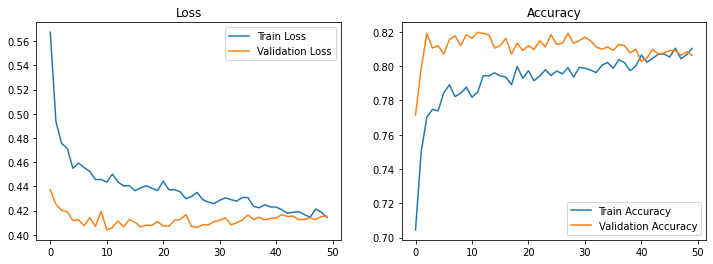

In [27]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()
